In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


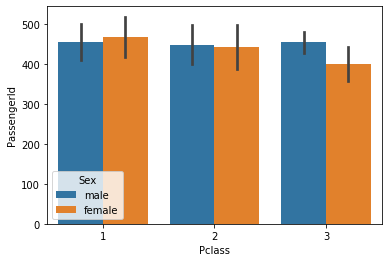

In [7]:
#So let's start with the first question: Who were the passengers on the titanic?
# Let's import what we'll need for the analysis and visualization
import matplotlib as plt
import seaborn as sns
sns.barplot(x='Pclass', y='PassengerId', data=df, hue='Sex')

In [9]:
# We'll treat anyone as under 16 as a child, 
# and then use the apply technique with a function to create a new column
# First let's make a function to sort through the sex 
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', 
df['Person'] = df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [10]:
df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


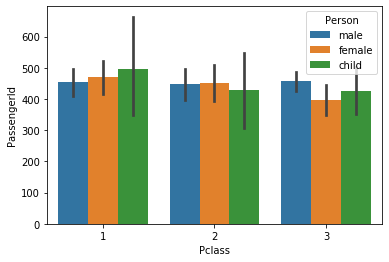

In [11]:
sns.barplot(x='Pclass', y='PassengerId', data=df, hue='Person')

In [14]:
# We could also get a quick overall comparison of male,female,child
df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

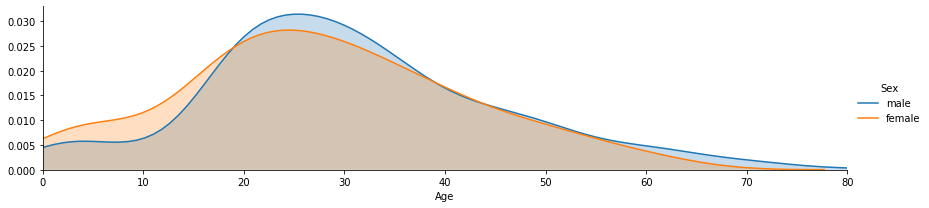

In [18]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade= True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

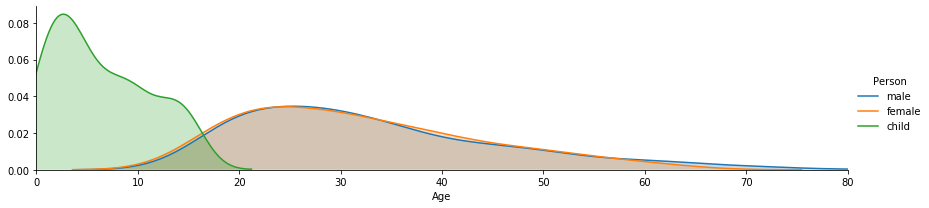

In [20]:
fig = sns.FacetGrid(df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade= True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

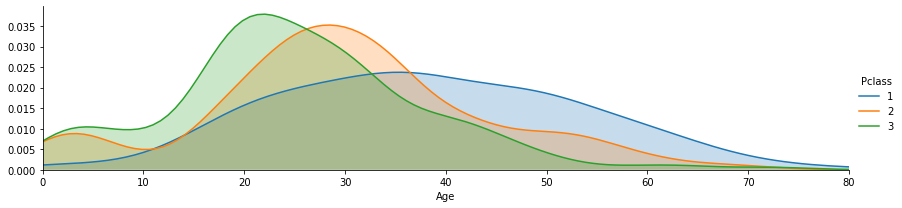

In [21]:
fig = sns.FacetGrid(df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade= True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [24]:
#We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. 
#So let's move on to our 2nd question
#What deck were the passengers on and how does that relate to their class?
# Let's get a quick look at our dataset again
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [26]:
#So we can see that the Cabin column has information on the deck, 
#but it has several NaN values, so we'll have to drop them.
# First we'll drop the NaN values and create a new object, deck
deck = df['Cabin'].dropna()

In [27]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

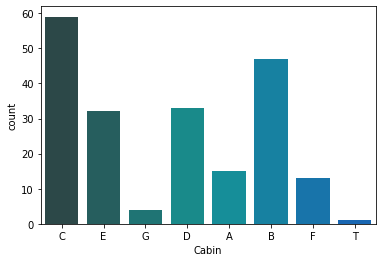

In [34]:
#Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)
# So let's grab that letter for the deck level with a simple for loop
from pandas import Series,DataFrame

levels = []

for level in deck:
    levels.append(level[0])    

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

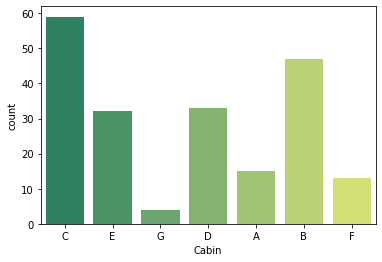

In [35]:
#Interesting to note we have a 'T' deck value there which doesn't make sense, 
#we can drop it out with the following code:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='summer')

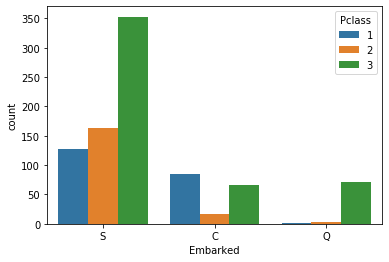

In [36]:
#3) Where did the passengers come from?
sns.countplot('Embarked', data=df, hue='Pclass')

In [39]:
#4.) Who was alone and who was with family?

# We'll add the parent/child column with the sibsp column
df['Alone'] =  df.Parch + df.SibSp
df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [40]:
# Look for >0 or ==0 to set alone status
df['Alone'].loc[df['Alone'] > 0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Alone'

/Users/gg8kyd/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


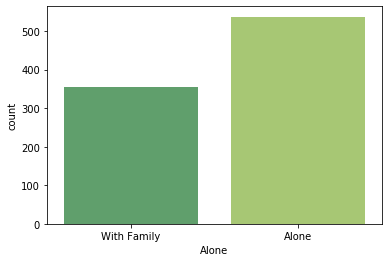

In [43]:
sns.countplot('Alone', data=df, palette='summer')

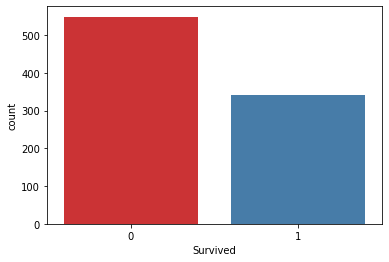

In [44]:
#What factors helped someone survive the sinking?
sns.countplot('Survived', data=df, palette='Set1')

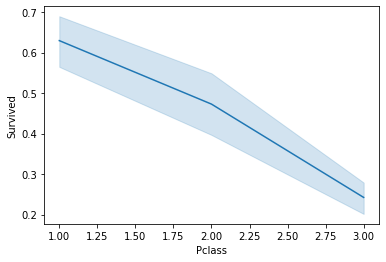

In [45]:
sns.lineplot('Pclass', 'Survived', data=df)

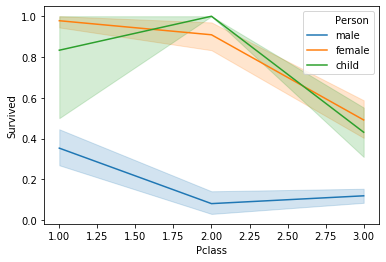

In [46]:
#Look like survival rates for the 3rd class are substantially lower!
#But maybe this effect is being caused by the large amount of men in the 3rd class in 
sns.lineplot('Pclass', 'Survived', hue='Person', data=df)

In [47]:
#From this data it looks like being a male or being in 3rd class 
#were both not favourable for survival. 
#Even regardless of class the result of being a male in any class dramatically 
#decreases your chances of survival.

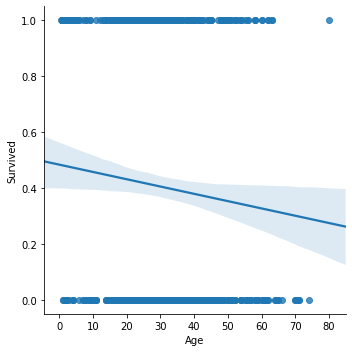

In [48]:
sns.lmplot('Age', 'Survived', data=df)

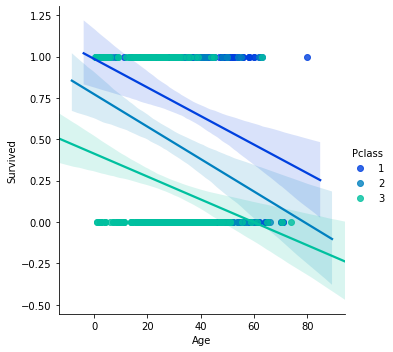

In [49]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=df, palette='winter')

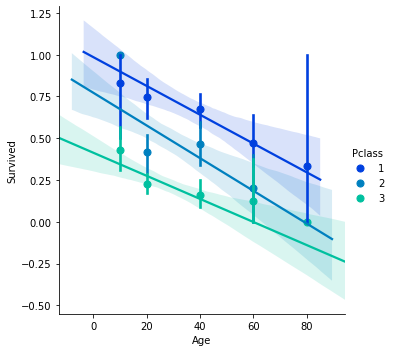

In [50]:
generations=[10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=df, palette='winter', x_bins=generations)

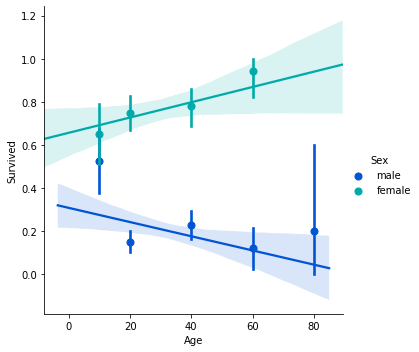

In [51]:
#Interesting find on the older 1st class passengers! 
sns.lmplot('Age', 'Survived', hue='Sex', data=df, palette='winter', x_bins=generations)